In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

Importar dataset

In [ ]:
depressao = files.upload()

Saving student_depression_dataset.csv to student_depression_dataset.csv


In [ ]:
df = pd.read_csv('student_depression_dataset.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Eliminação de colunas


In [ ]:
df = df.drop(columns=['id', 'Profession', 'Work Pressure', 'Job Satisfaction'])


df.isna().sum()

df.describe().T

In [ ]:
df = df.drop(columns=['Degree'])

for col in df.columns:
  print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
Academic Pressure: [5. 2. 3. 4. 1. 0.]
CGPA: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75    6.16
  9.

In [ ]:
binaryMap = {"No":0, "Yes":1, "Male":0, "Female":1}

SleepMap = {"'5-6 hours'":5.5 ,"'Less than 5 hours'":4, "'7-8 hours'":7.5, "'More than 8 hours'":9}

DietMap = {'Healthy':0, 'Moderate':1, 'Unhealthy':2}


In [ ]:
df_clean = df[~df.isin(['?', 'Others'])]
df_clean.dropna(inplace=True)


In [ ]:
df_clean['Gender'] = df_clean['Gender'].map(binaryMap)
df_clean['Sleep Duration'] = df_clean['Sleep Duration'].map(SleepMap)
df_clean['Dietary Habits'] = df_clean['Dietary Habits'].map(DietMap)
df_clean['Family History of Mental Illness'] = df_clean['Family History of Mental Illness'].map(binaryMap)
df_clean['Have you ever had suicidal thoughts ?'] = df_clean['Have you ever had suicidal thoughts ?'].map(binaryMap)



In [ ]:
for col in df_clean.columns:
  print(f'{col}: {df_clean[col].unique()}')

Gender: [0 1]
Age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
Academic Pressure: [5. 2. 3. 4. 1. 0.]
CGPA: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75    6.16
  9.5     7.99  

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27868 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27868 non-null  int64  
 1   Age                                    27868 non-null  float64
 2   Academic Pressure                      27868 non-null  float64
 3   CGPA                                   27868 non-null  float64
 4   Study Satisfaction                     27868 non-null  float64
 5   Sleep Duration                         27868 non-null  float64
 6   Dietary Habits                         27868 non-null  int64  
 7   Have you ever had suicidal thoughts ?  27868 non-null  int64  
 8   Work/Study Hours                       27868 non-null  float64
 9   Financial Stress                       27868 non-null  object 
 10  Family History of Mental Illness       27868 non-null  int64  
 11  Depress

Matriz de correlação

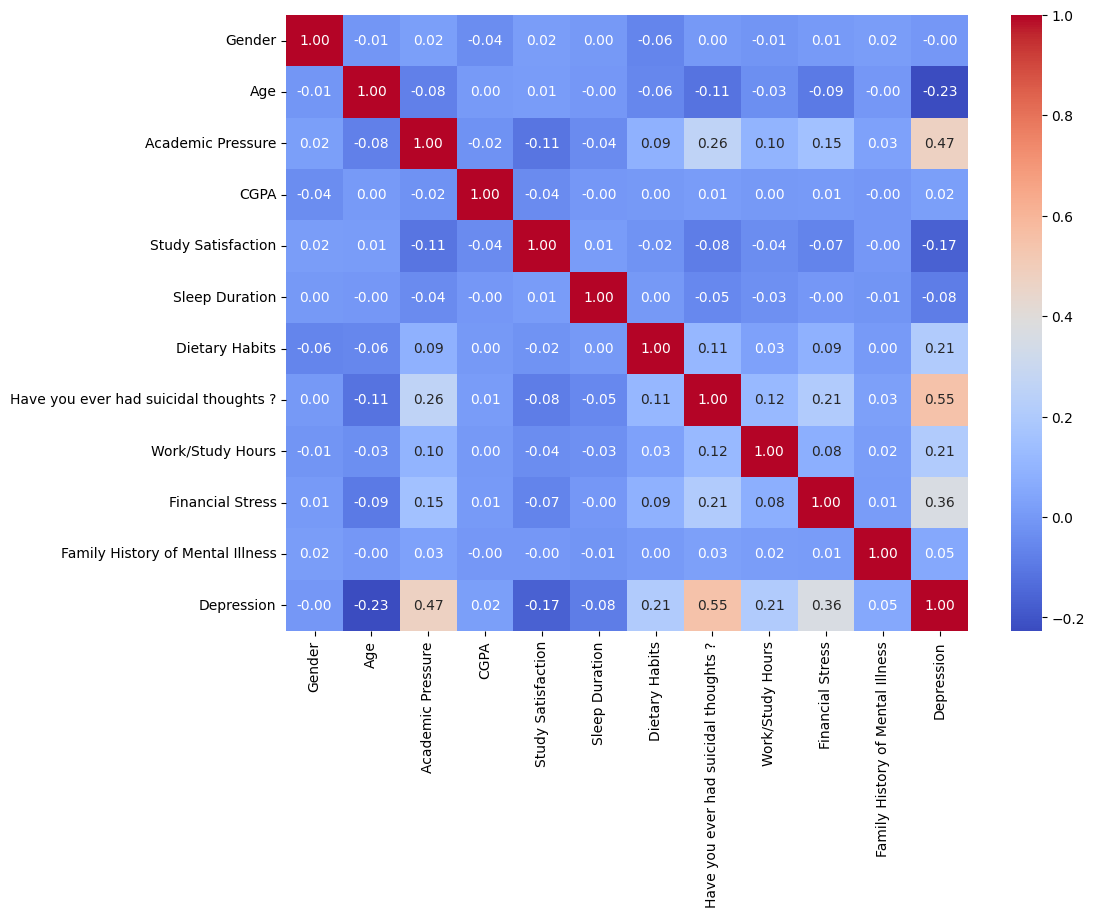

In [ ]:
plt.figure(figsize=(11, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
df_clean.to_csv('df_cleann.csv', index=False)